## Importing necessary libraries

In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


## Storing in an array all values and preprocessing

In [72]:
dataset_df1 = pd.read_csv(r"./premonsoon/ground_water_quality_2018_pre.csv")
dataset_df2 = pd.read_csv(r"./premonsoon/ground_water_quality_2019_pre.csv")
dataset_df3 = pd.read_csv(r"./premonsoon/ground_water_quality_2020_pre.csv")
dataset_df4 = pd.read_csv(r"./premonsoon/ground_water_quality_2021_pre.csv")
dataset_df5 = pd.read_csv(r"./premonsoon/ground_water_quality_2022_pre.csv")
dataset_df6 = pd.read_csv(r"./postmonsoon/ground_water_quality_2018_post.csv")
dataset_df7 = pd.read_csv(r"./postmonsoon/ground_water_quality_2019_post.csv")
dataset_df8 = pd.read_csv(r"./postmonsoon/ground_water_quality_2020_post.csv")
dataset_df9 = pd.read_csv(r"./postmonsoon/ground_water_quality_2021_post.csv")
dataset_df = pd.concat([dataset_df1,dataset_df2,dataset_df3,dataset_df4,dataset_df5,dataset_df6,dataset_df7,dataset_df8,dataset_df9],join='outer',ignore_index=True)
dataset_df.drop(columns=['RL_GIS','sno','village','mandal','district','gwl'],inplace=True)
dataset_df['season']=dataset_df['season'].astype(str).apply(lambda x: 0 if 'pre' in x.lower() else 1)

In [73]:
dataset_df['pH'] = pd.to_numeric(dataset_df['pH'], errors='coerce')

# Now convert to float
dataset_df['pH'] = dataset_df['pH'].astype(float)
dataset_df['RSC  meq  / L'] = pd.to_numeric(dataset_df['RSC  meq  / L'], errors='coerce')

# Now convert to float
dataset_df['RSC  meq  / L'] = dataset_df['RSC  meq  / L'].astype(float)


In [74]:
#To remove rows containing null values
for index, row in dataset_df.iterrows():
    if 'NA' in row.values:
        dataset_df.drop(index, inplace=True)
    elif(row['Classification']=='OG')or(row['Classification']=='O.G')or(row['Classification']=='BELOW THE GRAPH')or(row['Classification']=='OUT OF SAR GRAPH')or(row['Classification']=='BG'):
        dataset_df.drop(index, inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [75]:
null_threshold = len(dataset_df) * 0.25
for column in dataset_df.columns:
    null_count = dataset_df[column].isnull().sum()
    if null_count > null_threshold:
        dataset_df.drop(column, axis=1, inplace=True)
    elif null_count > 0:
        dataset_df.dropna(subset=[column], inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [76]:
dataset_df.columns

Index(['long_gis', 'lat_gis', 'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3',
       'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR',
       'Classification', 'RSC  meq  / L', 'Classification.1'],
      dtype='object')

In [77]:
dataset_df.describe()

,long_gis,lat_gis,season,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.00000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,66.772025,29.599037,0.387202,7.843799,1233.101610,789.881749,5.41146,268.275171,174.904218,1.037786,60.958889,49.644993,117.753836,8.560754,68.429224,47.475201,366.806037,2.790353,-1.865046
std,24.484076,24.306903,0.487160,0.458430,738.381329,473.032944,16.97257,128.542345,171.081966,0.812726,79.534434,63.171954,103.979699,21.907266,52.806161,34.073709,216.250298,2.589769,4.136058
min,0.000000,0.000000,0.000000,6.160000,102.000000,65.280000,0.00000,10.000000,10.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.100000,19.995888,0.140000,-59.584539
25%,77.770000,17.270000,0.000000,7.530000,750.000000,481.000000,0.00000,180.000000,60.000000,0.520000,13.488318,16.000000,53.000000,2.000000,32.000000,24.310000,220.000000,1.360000,-3.200000
50%,78.474600,17.970000,0.000000,7.880000,1047.000000,670.720000,0.00000,250.000000,120.000000,0.840000,36.000000,29.000000,88.000000,3.220000,56.000000,39.000000,320.000000,2.090000,-1.200000
75%,79.290000,19.024500,1.000000,8.180000,1520.000000,974.000000,0.00000,340.000000,220.000000,1.290000,74.559325,55.000000,145.450000,6.870000,88.000000,63.000000,459.893092,3.225302,0.001000
max,81.180000,81.180000,1.000000,10.590000,9499.000000,6079.360000,200.00000,1240.000000,2480.000000,13.700000,1028.000000,860.000000,1154.000000,356.000000,640.000000,457.028000,3479.226974,31.435063,18.200822


In [78]:
dataset_df.shape

(4907, 21)

In [79]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907 entries, 0 to 4906
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   long_gis          4907 non-null   float64
 1   lat_gis           4907 non-null   float64
 2   season            4907 non-null   int64  
 3   pH                4907 non-null   float64
 4   E.C               4907 non-null   float64
 5   TDS               4907 non-null   float64
 6   CO3               4907 non-null   float64
 7   HCO3              4907 non-null   float64
 8   Cl                4907 non-null   float64
 9   F                 4907 non-null   float64
 10  NO3               4907 non-null   float64
 11  SO4               4907 non-null   float64
 12  Na                4907 non-null   float64
 13  K                 4907 non-null   float64
 14  Ca                4907 non-null   float64
 15  Mg                4907 non-null   float64
 16  T.H               4907 non-null   float64


In [80]:
all_labels=dataset_df['Classification'].unique()
for label in all_labels:
    print(label)

C3S1
C2S1
C3S2
C4S1
C4S2
C1S1
C4S3
C4S4
C3S3
C3S4
C2S2


In [81]:
print(len(dataset_df[dataset_df['Classification']=='OG']),len(dataset_df[dataset_df['Classification']=='O.G']),len(dataset_df[dataset_df['Classification']=='BELOW THE GRAPH']),len(dataset_df[dataset_df['Classification']=='OUT OF SAR GRAPH']),len(dataset_df[dataset_df['Classification']=='BG']))

0 0 0 0 0


In [82]:
#encoding/labelling the target column
label_mapping = {
    label: index for index, label in enumerate(dataset_df['Classification'].unique())
}
# Map labels to numerical values
dataset_df['Classification'] = dataset_df['Classification'].map(label_mapping)
dataset_df['Classification'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [83]:
label_mapping

{'C3S1': 0,
 'C2S1': 1,
 'C3S2': 2,
 'C4S1': 3,
 'C4S2': 4,
 'C1S1': 5,
 'C4S3': 6,
 'C4S4': 7,
 'C3S3': 8,
 'C3S4': 9,
 'C2S2': 10}

In [84]:
#standardisation of the data
means = dataset_df.drop(columns=['Classification','Classification.1']).mean()
stds = dataset_df.drop(columns=['Classification','Classification.1']).std()
for col in dataset_df.columns:
    if col != 'Classification' and col != 'Classification.1':  # Exclude target column from standardization
        dataset_df[col] = (dataset_df[col] - means[col]) / stds[col]
#min max scaling
#for col in dataset_df.columns:
#    if col != 'Classification' and col!='Classification.1':  # Exclude the target column
#        min_val = dataset_df[col].min()
#        max_val = dataset_df[col].max()
#        dataset_df[col] = (dataset_df[col] - min_val) / (max_val - min_val)


In [85]:
# randomising the dataframe and splitting to get train and test dataframes
dataset_df = dataset_df.sample(frac=1, random_state=42)
num_rows = len(dataset_df)
train_size = int(0.8 * num_rows)
test_size = num_rows - train_size
# Split the DataFrame into training and testing sets
train_dataset_df = dataset_df.head(train_size)
test_dataset_df = dataset_df.tail(test_size)

## Implementation of softmax regression

![image.png](softmaxExplanation.png)

The softmax regression predicts probability of any instance to belong to one of the class using softmax function. Here z1,z2,..,zc denote linear combination of input features. (c is number of classes here). Here gradient descent would be used to find the weights( which are used to calculate zi's and ultimately the probabilities).

In [86]:
X_train = train_dataset_df.drop(columns=['Classification','Classification.1'], axis=1).values
y_train = train_dataset_df['Classification'].values
X_test = test_dataset_df.drop(columns=['Classification','Classification.1'], axis=1).values
y_test = test_dataset_df['Classification'].values
print("The shape of training data is (it is a dataframe):",X_train.shape)
num_of_features=X_train.shape[1]
num_of_classes=len(label_mapping)

The shape of training data is (it is a dataframe): (3925, 19)


In [103]:
class SoftmaxRegression:
    #Learning rate is preset to 0.01 and number of epochs is set to 1000
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.01, num_epochs=1000):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = np.zeros((num_of_features, num_of_classes))#initially all weights and biases are set to 0
        self.b = np.zeros(num_of_classes)
        self.loss_history = []

    def softmax(self, z):#softmax function, z is matrix, where each row corresponds to a sample and each column is a class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))#subtracted the maximum value in each row to help prevent overflow and maintain numerical stability in exponentiation
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):#y is labels of input ,vector
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1#for each row, column corresponding to that sample is set to one and others to 0
        return one_hot_y

    #forward and backward propogation
    def fit(self, X, y):
        y_one_hot = self.one_hot_encode(y)
        #training loop
        for epoch in range(self.num_epochs):
            #forward propogation, 
            z = np.dot(X, self.W) + self.b#result z is also a matrix
            y_pred = self.softmax(z)#result is a matrix
            loss = self.cross_entropy_loss(y_one_hot, y_pred)#loss function used is cross entropy loss
            self.loss_history.append(loss)
            dz = y_pred - y_one_hot#update
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0)
            #backward propogation
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        self.plot_loss()
        
    #loss over epochs
    def plot_loss(self):
        plt.plot(range(1, self.num_epochs + 1), self.loss_history, label='Training Loss')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid zeros
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))#cross entropy function is used here


    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        return np.argmax(y_pred, axis=1)#choose that class with largest probability for each class
    
    def evaluate(self, X, y,print_confusion_matrix=False):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        
        # Calculate precision, recall, and F1-score
        tp = np.sum((y_pred == y) & (y_pred == 1))#true positives
        fp = np.sum((y_pred != y) & (y_pred == 1))#false positives
        fn = np.sum((y_pred != y) & (y_pred == 0))#false negatives
        if (tp + fp != 0):
            precision = tp / (tp + fp)  
        else:
            precision = 0
        if (tp + fn != 0):
            recall = tp / (tp + fn) 
        else :
            recall=0
        if (precision+recall !=0):
            f1_score = 2 * precision * recall / (precision + recall)
        else :
            f1_score=0
        print(f"Precision:{precision:.4f}")
        print(f"Recall:{precision:.4f}")
        print(f"Accuracy:{precision:.4f}")
        print(f"F1_Score:{f1_score:.4f}")
        if print_confusion_matrix:
            confusion = confusion_matrix(y, y_pred)
            self.plot_confusion_matrix(confusion)
        self.plot_ROC_Curve(X)
    
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
    def calculate_auc(self,tprs, fprs):
        #to get auc for each class
        sorted_indices = np.argsort(fprs)
        fprs_sorted = np.array(fprs)[sorted_indices]
        tprs_sorted = np.array(tprs)[sorted_indices]
        auc = np.trapz(tprs_sorted, fprs_sorted)
        return auc
    def calculate_rates(self,y_pred,y_true,class_index):
        #to calculate tpr and fpr for each class at various thresholds
        thresholds = np.linspace(0, 1, 1000)
        tprs = []
        fprs = []
        for threshold in thresholds:
            y_pred_binary = (y_pred[:, class_index] >= threshold).astype(int)
            true_positives = np.sum((y_pred_binary == 1) & (y_true == class_index))
            false_positives = np.sum((y_pred_binary == 1) & (y_true != class_index))
            false_negatives = np.sum((y_pred_binary == 0) & (y_true == class_index))
            true_negatives = np.sum((y_pred_binary == 0) & (y_true != class_index))
            tpr = true_positives / (true_positives + false_negatives)
            fpr = false_positives / (false_positives + true_negatives)
            tprs.append(tpr)
            fprs.append(fpr)
        auc = self.calculate_auc(tprs, fprs)
        return tprs, fprs,auc
    
    def plot_ROC_Curve(self,X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        plt.figure(figsize=(8, 6))
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plot the random classifier line
        for class_index in range(num_of_classes):
            tprs, fprs ,auc= self.calculate_rates(y_pred, y_test, class_index)
            plt.plot(fprs, tprs, label=f'Class {class_index} (AUC = {auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves for Softmax Regression')
        plt.legend()
        plt.grid(True)
        plt.show()

## Fitting the model/training

Epoch 100/1000, Loss: 1.7658
Epoch 200/1000, Loss: 1.8015
Epoch 300/1000, Loss: 1.5502
Epoch 400/1000, Loss: 1.4721
Epoch 500/1000, Loss: 1.4144
Epoch 600/1000, Loss: 1.3469
Epoch 700/1000, Loss: 1.3223
Epoch 800/1000, Loss: 1.2960
Epoch 900/1000, Loss: 1.2694
Epoch 1000/1000, Loss: 1.2498


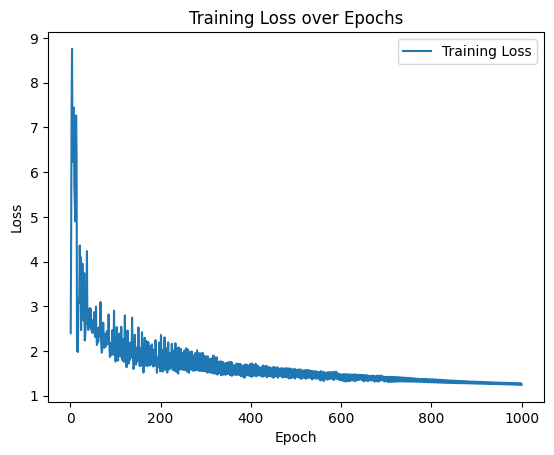

In [104]:
softmax_model = SoftmaxRegression(num_of_features, num_of_classes)
softmax_model.fit(X_train, y_train)

## Evaluating the model

Precision:0.8643
Recall:0.8643
Accuracy:0.8643
F1_Score:0.8902


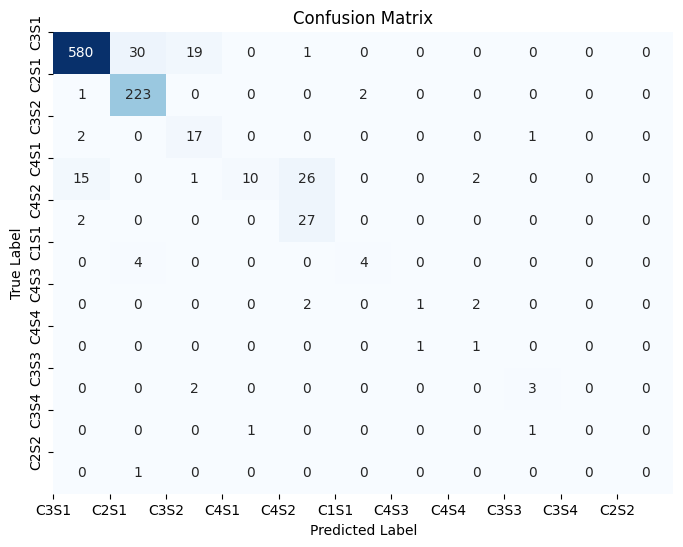

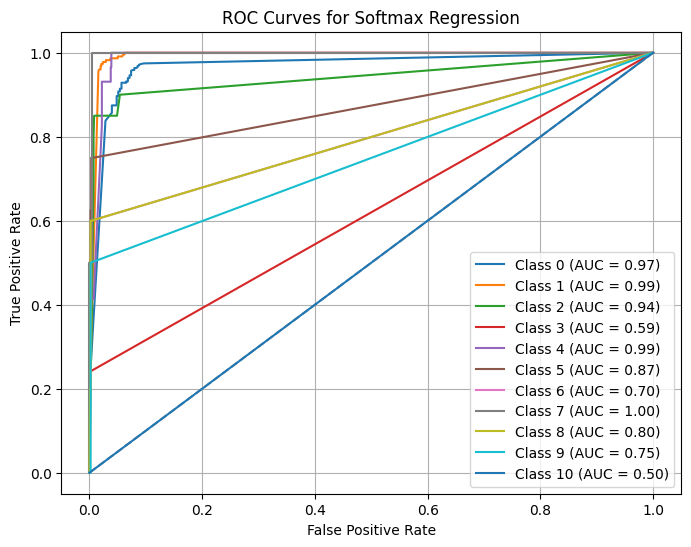

In [105]:
softmax_model.evaluate(X_test,y_test,True)

Precision:0.9643
Recall:0.9643
Accuracy:0.9643
F1_Score:0.9290


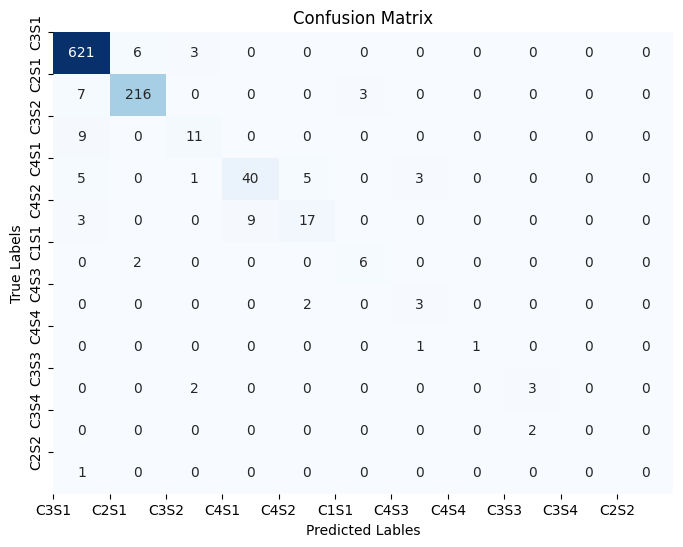

In [90]:
# with using scikit learns function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Train softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train, y_train)
# Predict on the test set
y_pred = softmax_reg.predict(X_test)
# Calculate accuracy,precision, recall,f1score
accuracy = np.mean(y_pred == y_test)
# Calculate precision, recall, and F1-score
tp = np.sum((y_pred == y_test) & (y_pred == 1))#true positives
fp = np.sum((y_pred != y_test) & (y_pred == 1))#false positives
fn = np.sum((y_pred != y_test) & (y_pred == 0))#false negatives
if (tp + fp != 0):
    precision = tp / (tp + fp)  
else:
    precision = 0
if (tp + fn != 0):
    recall = tp / (tp + fn) 
else :
    recall=0
if (precision+recall !=0):
    f1_score = 2 * precision * recall / (precision + recall)
else :
    f1_score=0
print(f"Precision:{precision:.4f}")
print(f"Recall:{precision:.4f}")
print(f"Accuracy:{precision:.4f}")
print(f"F1_Score:{f1_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.xlabel('Predicted Lables')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Looking for optimizations

### Tackling Class Imbalances

In [91]:
#for removing class imbalances
class_counts = np.bincount(y_train) 
total_samples = len(y_train)
# Calculate class weights for each class
class_weights = total_samples / (num_of_classes * class_counts)
# Define the class weights dictionary
class_weight_dict = {class_index: class_weights[class_index] for class_index in range(num_of_classes-1)}
class_counts

array([2477,  943,   92,  184,  119,   44,   20,   24,   18,    4],
      dtype=int64)

In [92]:
class_weight_dict

{0: 0.14405255624472418,
 1: 0.378386194929143,
 2: 3.8784584980237153,
 3: 1.9392292490118577,
 4: 2.9984721161191747,
 5: 8.109504132231406,
 6: 17.84090909090909,
 7: 14.867424242424242,
 8: 19.82323232323232,
 9: 89.20454545454545}

In [94]:
class SoftmaxRegression_ClassImbalanced:
    #Learning rate is preset to 0.01 and number of epochs is set to 1000
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.01, num_epochs=1000,class_weights=None):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = np.zeros((num_of_features, num_of_classes))#initially all weights and biases are set to 0
        self.b = np.zeros(num_of_classes)
        self.loss_history = []
        self.class_weights = class_weights if class_weights is not None else np.ones(num_of_classes)

    def softmax(self, z):#softmax function, z is matrix, where each row corresponds to a sample and each column is a class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))#subtracted the maximum value in each row to help prevent overflow and maintain numerical stability in exponentiation
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):#y is labels of input ,vector
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1#for each row, column corresponding to that sample is set to one and others to 0
        return one_hot_y

    #forward and backward propogation
    def fit(self, X, y):
        y_one_hot = self.one_hot_encode(y)
        #training loop
        for epoch in range(self.num_epochs):
            #forward propogation, 
            z = np.dot(X, self.W) + self.b#result z is also a matrix
            y_pred = self.softmax(z)#result is a matrix
            loss = self.cross_entropy_loss(y_one_hot, y_pred)#loss function used is cross entropy loss
            self.loss_history.append(loss)
            dz = y_pred - y_one_hot#update
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0)
            #Considering class imbalances
            dW *= self.class_weights.T
            db *= self.class_weights
            #backward propogation
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        self.plot_loss()
        
    #loss over epochs
    def plot_loss(self):
        plt.plot(range(1, self.num_epochs + 1), self.loss_history, label='Training Loss')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid zeros
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))#cross entropy function is used here


    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        return np.argmax(y_pred, axis=1)#choose that class with largest probability for each class
    
    def evaluate(self, X, y,print_confusion_matrix=False):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        
        # Calculate precision, recall, and F1-score
        tp = np.sum((y_pred == y) & (y_pred == 1))#true positives
        fp = np.sum((y_pred != y) & (y_pred == 1))#false positives
        fn = np.sum((y_pred != y) & (y_pred == 0))#false negatives
        if (tp + fp != 0):
            precision = tp / (tp + fp)  
        else:
            precision = 0
        if (tp + fn != 0):
            recall = tp / (tp + fn) 
        else :
            recall=0
        if (precision+recall !=0):
            f1_score = 2 * precision * recall / (precision + recall)
        else :
            f1_score=0
        print(f"Precision:{precision:.4f}")
        print(f"Recall:{precision:.4f}")
        print(f"Accuracy:{precision:.4f}")
        print(f"F1_Score:{f1_score:.4f}")
        if print_confusion_matrix:
            confusion = confusion_matrix(y, y_pred)
            self.plot_confusion_matrix(confusion)
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        

Epoch 100/1000, Loss: 2.5585
Epoch 200/1000, Loss: 2.6142
Epoch 300/1000, Loss: 2.1864
Epoch 400/1000, Loss: 2.2533
Epoch 500/1000, Loss: 1.9786
Epoch 600/1000, Loss: 2.4571
Epoch 700/1000, Loss: 1.9031
Epoch 800/1000, Loss: 2.5348
Epoch 900/1000, Loss: 1.7962
Epoch 1000/1000, Loss: 1.7997


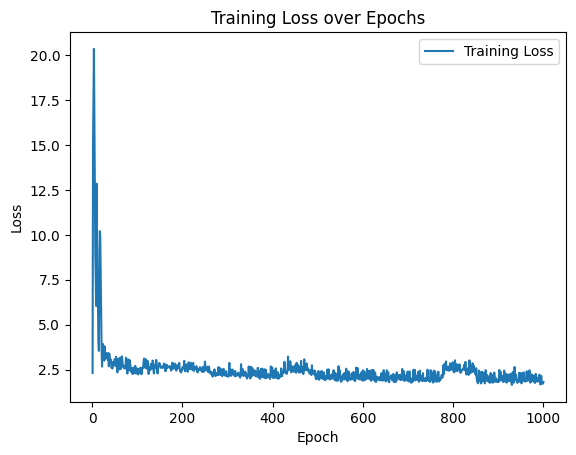

In [95]:
softmax_model_changed = SoftmaxRegression_ClassImbalanced(num_of_features, num_of_classes-1,class_weights)
softmax_model_changed.fit(X_train, y_train)

Precision:0.9605
Recall:0.9605
Accuracy:0.9605
F1_Score:0.9440


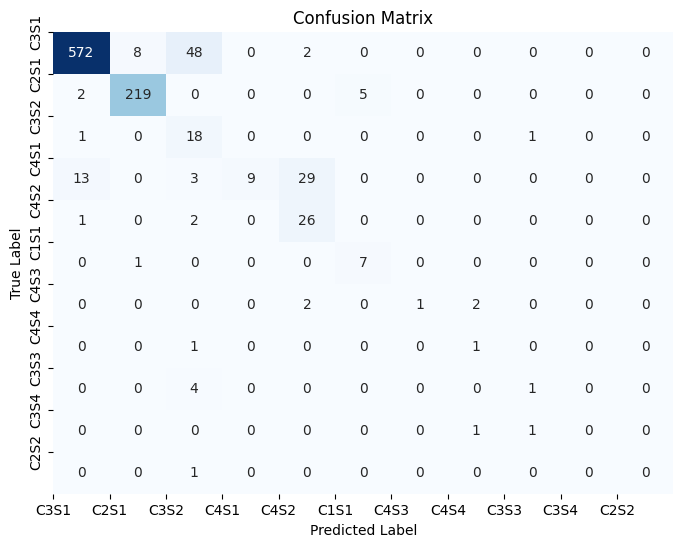

In [96]:
softmax_model_changed.evaluate(X_test,y_test,True)

### Hyperparameter tuning